**Name:** <span style="color:red">Eloi Vilella</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Oscillations


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The aim of this practical is to explore the dynamics of oscillatory systems and the requirements for oscillations.

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A. **Oscillations from a negative feedback: the Goodwin oscillator**

We will begin by studying the following two-dimensional system:
    
$\displaystyle{\frac{dx_1}{dt}=\frac{1}{1+x_2^n}-k_1\,x_1}$

$\displaystyle{\frac{dx_2}{dt}=x_1-k_2\,x_2}$

a) Consider that $k_1=k_2=0.1$. Is there any vaue of $n$ lower than 12 for which the system shows sustained oscillations?

b) For each of the previous cases, how does the system behave on the phase plane? (Draw the nullclines and plot the trajectory of the system on the phase plane.)



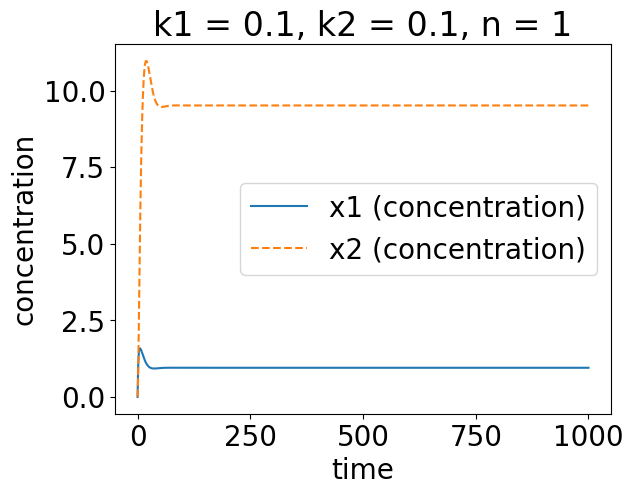

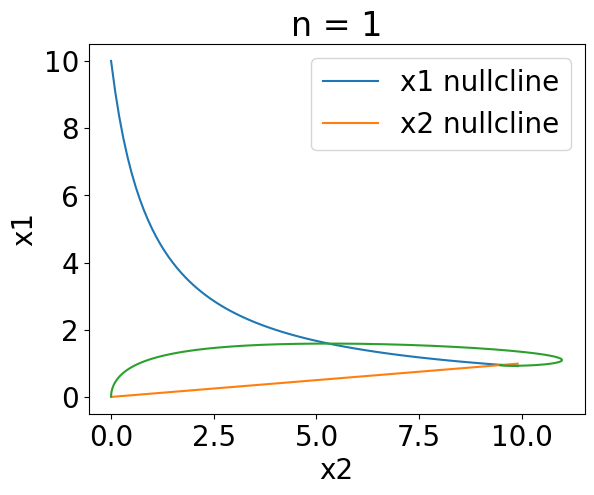

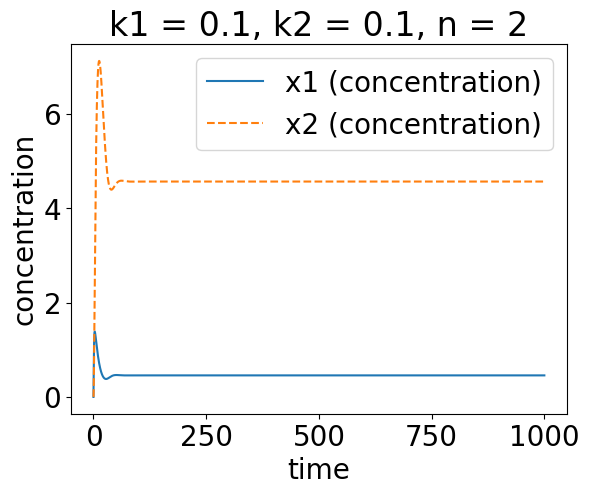

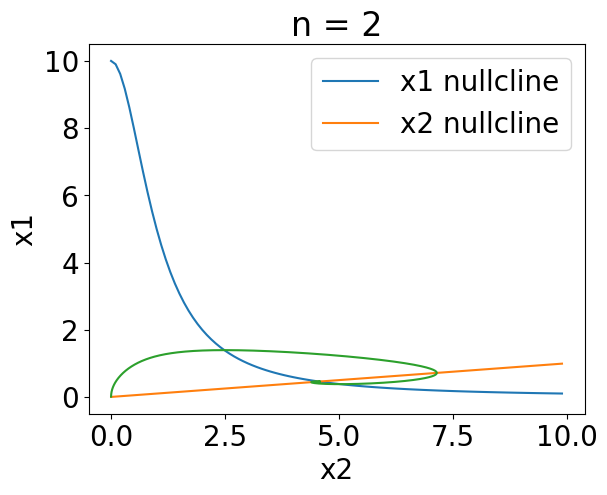

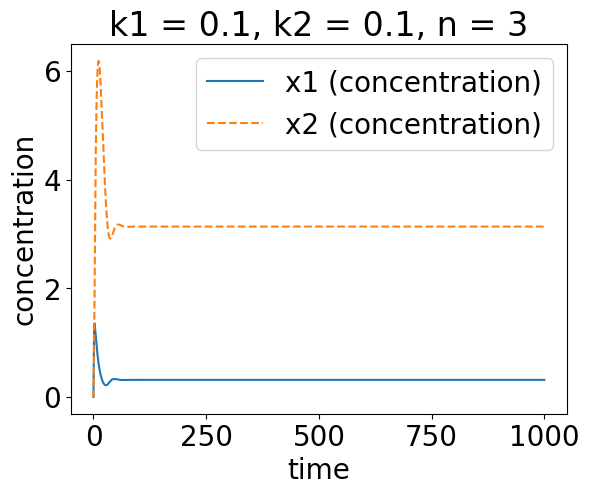

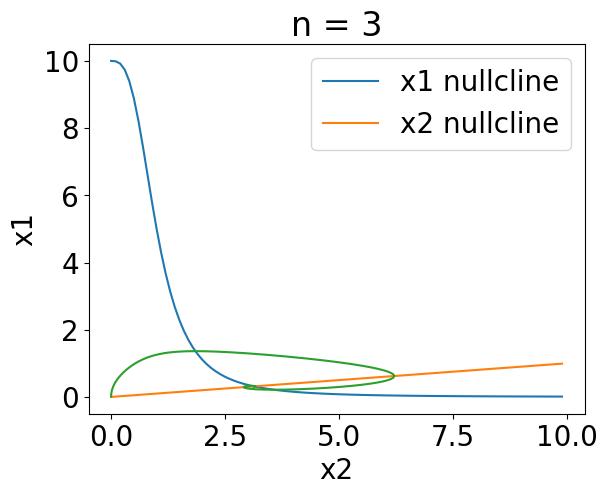

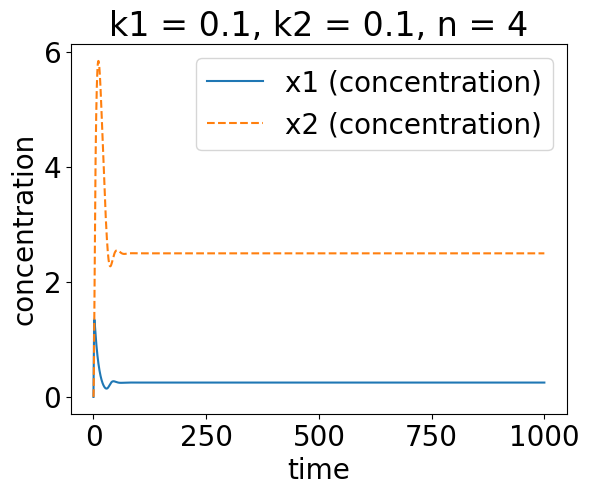

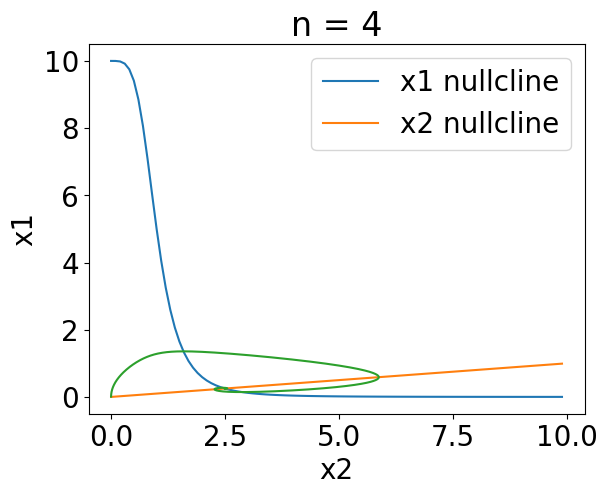

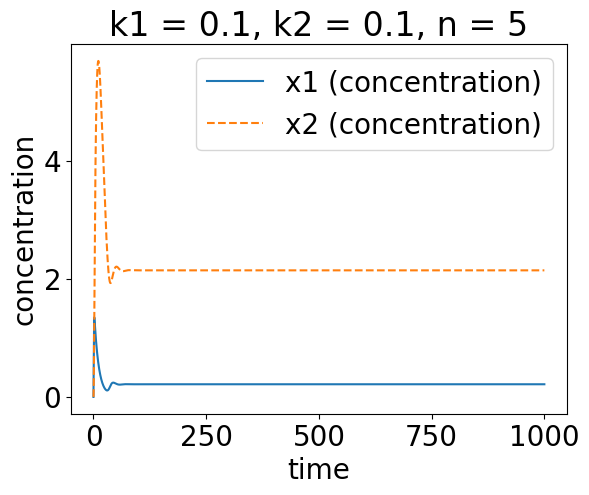

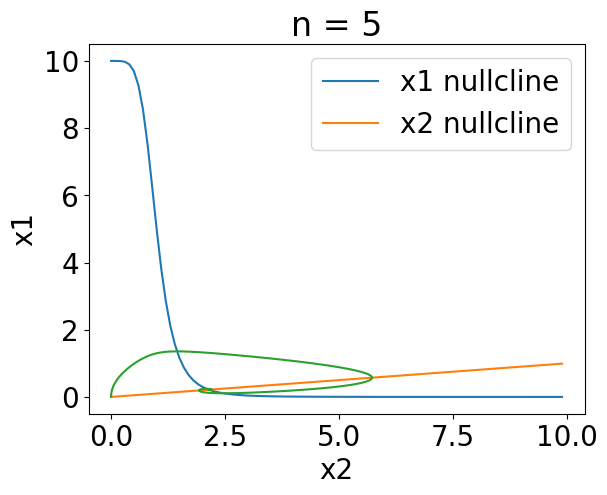

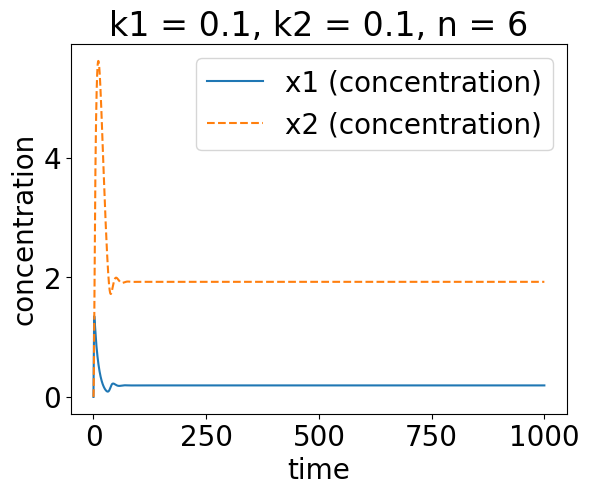

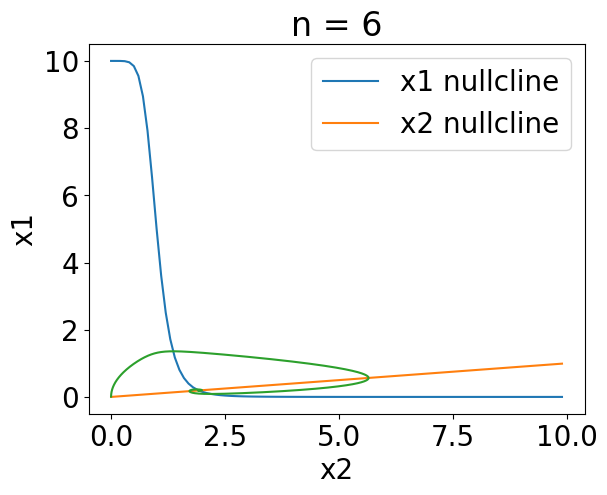

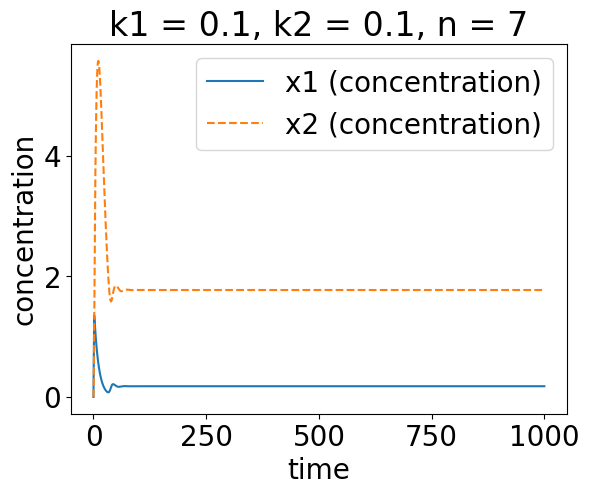

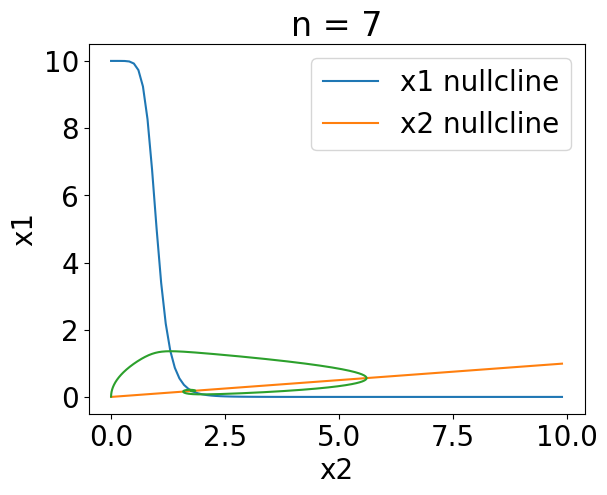

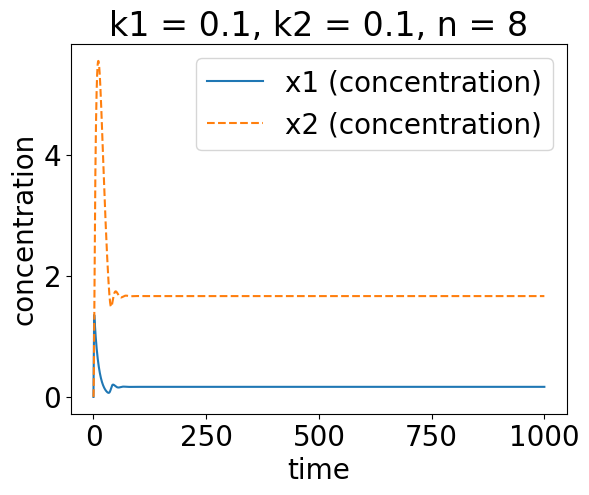

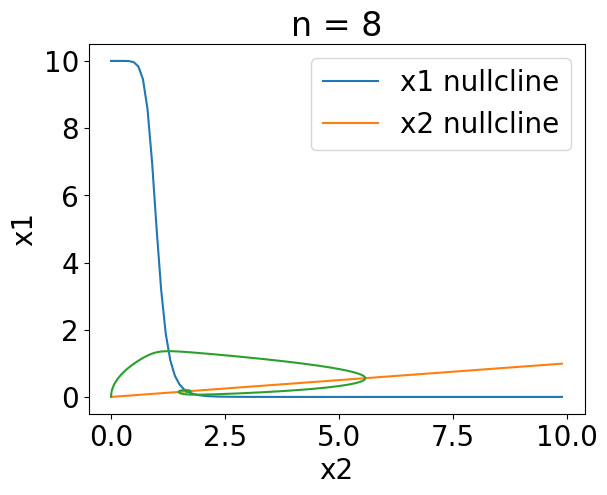

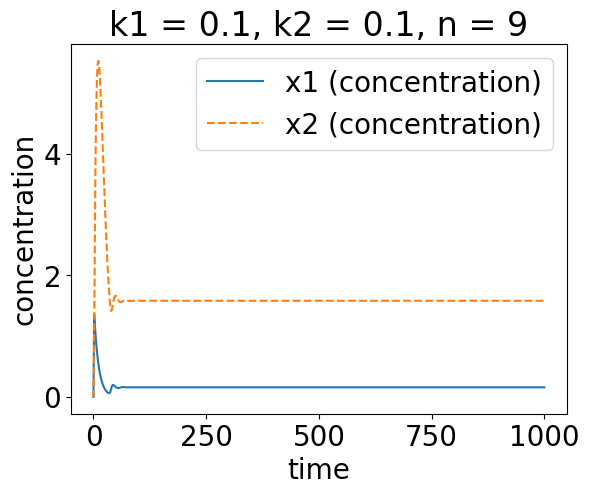

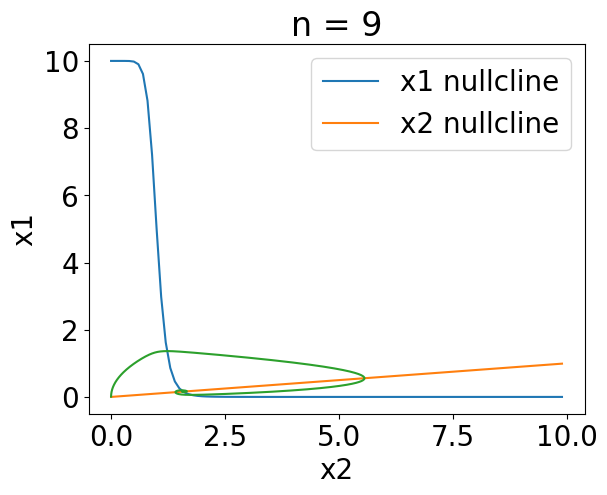

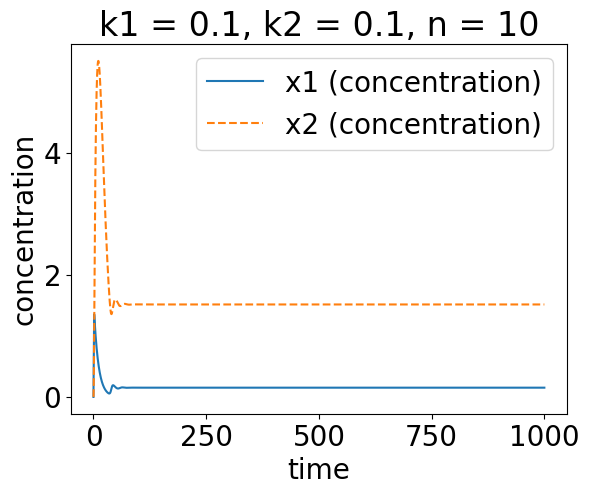

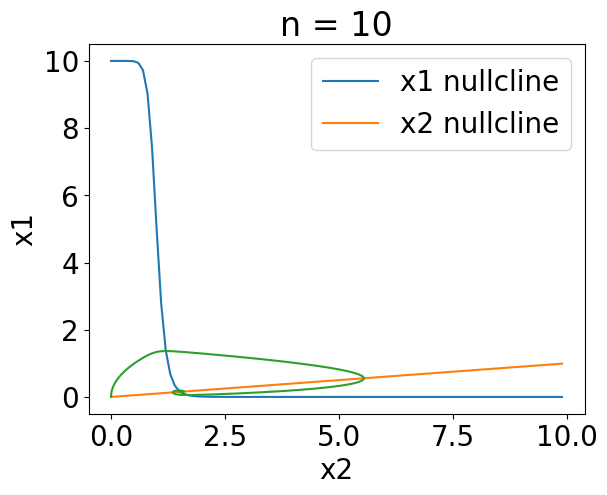

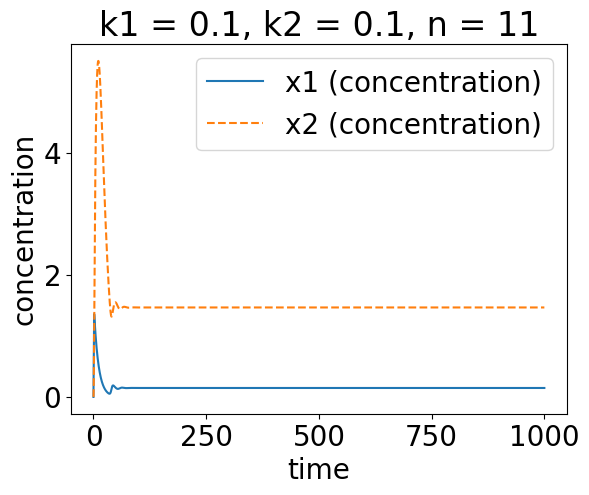

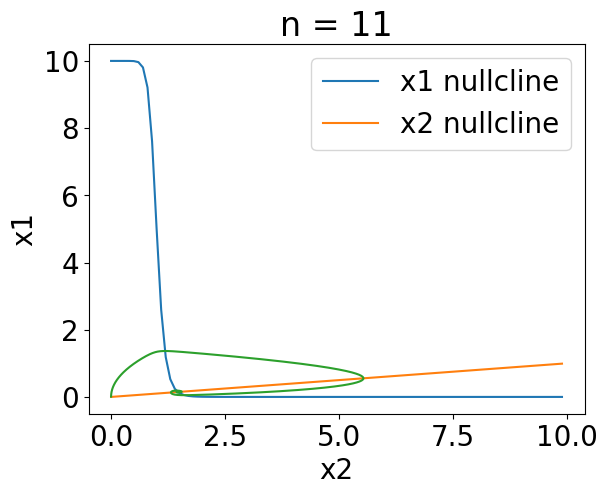

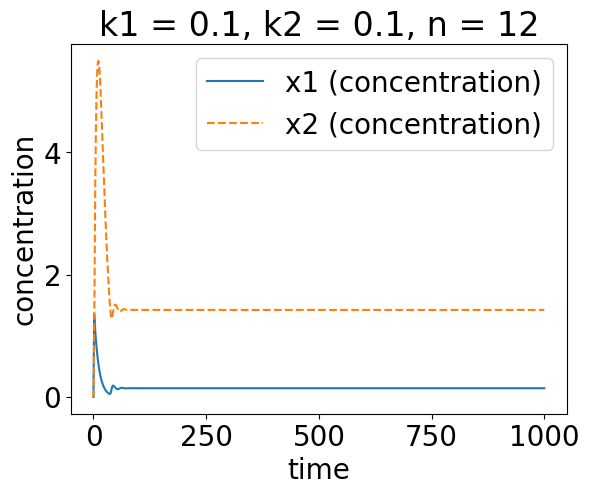

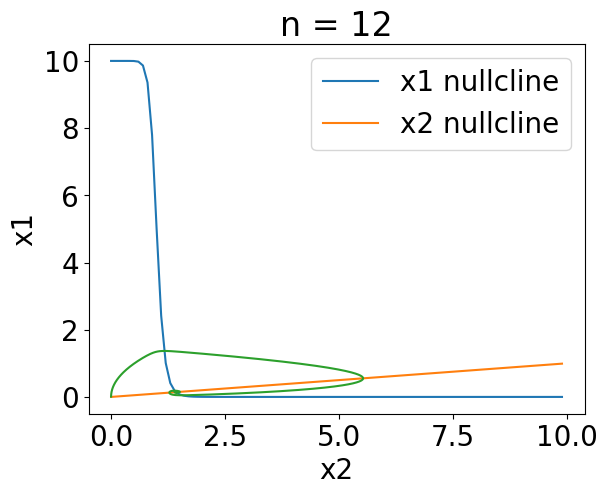

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def oscillation(vars, t, k1=0.1, k2=0.1, n=2):
    x1, x2 = vars
    dx1_dt = 1 / (1 + x2**n) - k1 * x1
    dx2_dt = x1 - k2 * x2
    return [dx1_dt, dx2_dt]

def simulate_system(n, x1, x2, time_steps, k1=0.1, k2=0.1):
    trajectory_x1 = []
    trajectory_x2 = []
    dt = time_steps[1] - time_steps[0] 

    for t in time_steps:
        dx1_dt = 1 / (1 + x2**n) - k1 * x1
        dx2_dt = x1 - k2 * x2
        x1 += dx1_dt * dt
        x2 += dx2_dt * dt
        trajectory_x1.append(x1)
        trajectory_x2.append(x2)

    return trajectory_x1, trajectory_x2

for n in range(1, 13):
    k1 = 0.1
    k2 = 0.1

    tvec = np.arange(0, 1000, 0.01)

    Ap_0 = [0, 0]

    y = odeint(oscillation, Ap_0, tvec, args=(k1, k2, n))

    plt.figure()
    plt.rc('font', size=20)
    plt.plot(tvec, y[:, 0], label='x1 (concentration)')
    plt.plot(tvec, y[:, 1], label='x2 (concentration)', linestyle='--')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('concentration')
    plt.title(f"k1 = 0.1, k2 = 0.1, n = {n}")
    plt.show()

    x2_null = np.arange(0, 10, 0.1)
    x1_x1_null = 1 / (1 + x2_null**n) / k1

    x1_x2_null = k2 * x2_null
    trajectory_x1, trajectory_x2 = simulate_system(n, 0, 0, tvec, k1, k2)
    plt.figure()
    plt.plot(x2_null, x1_x1_null, label='x1 nullcline')
    plt.plot(x2_null, x1_x2_null, label='x2 nullcline')
    plt.plot(trajectory_x2,trajectory_x1)
    plt.xlabel('x2')
    plt.ylabel('x1')
    plt.title(f'n = {n}')
    plt.legend()
    plt.show()

---

As N gets higher the the peak of x2 gets lower. that could be because x1 becomes more sensitive to inhibition by x2, which makes x1's oscillations smaller and reach a lower stable level. This means the system moves from smooth oscillations to a more on-off, switch-like behavior, where x1 is kept low due to stronger feedback from x2.

---

c) Now add a third variable $x_3$ that evolves according to:
    $\frac{dx_3}{dt}=x_2-k_3\,x_3$, with $k_3$=0.1,
and consider that $x_1$ is inhibited by $x_3$ instead of $x_2$.   
Is there now a value of $n$ for which the system shows sustained oscillations? (Make sure you integrate for sufficiently long time, it may help to plot the beginning and the final part of the simulation in different subplots.

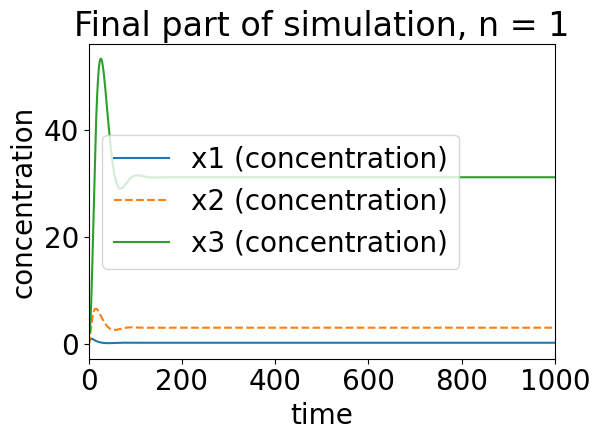

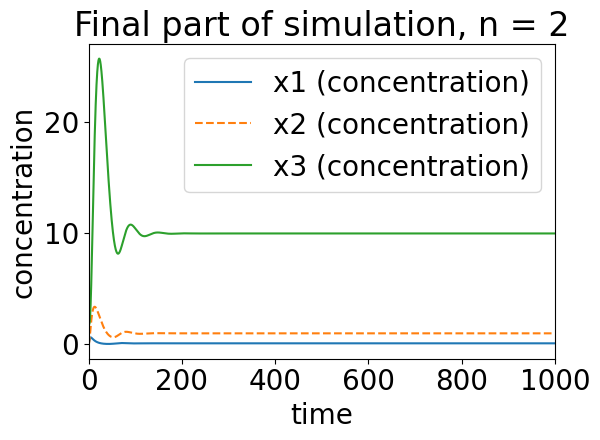

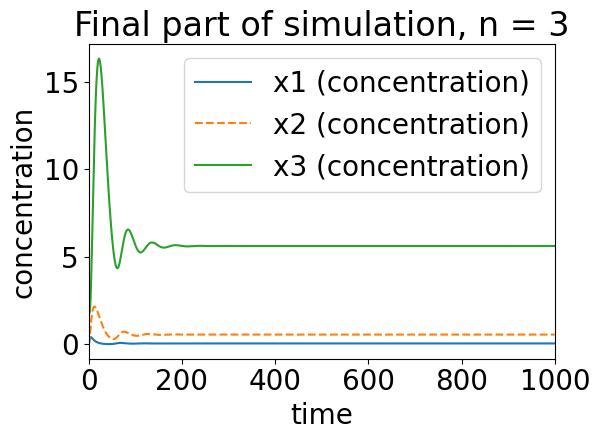

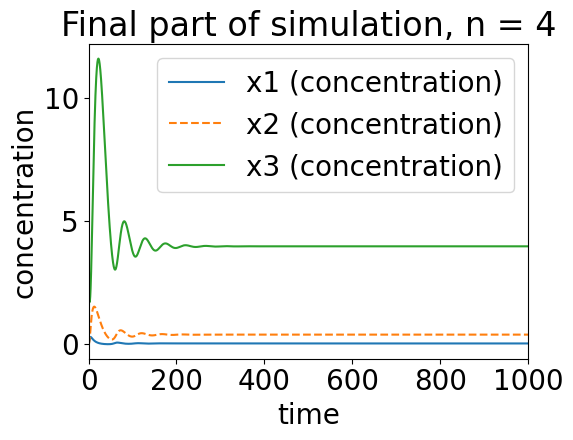

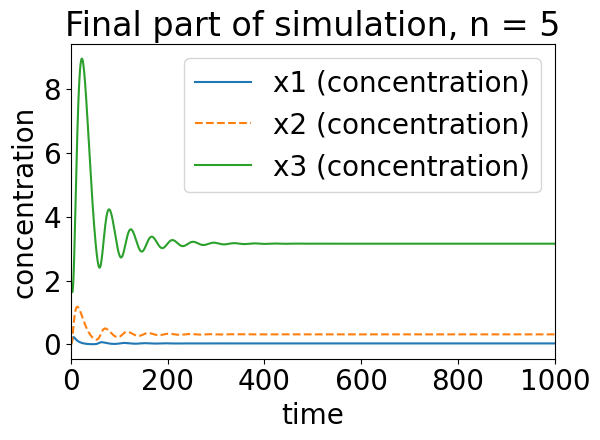

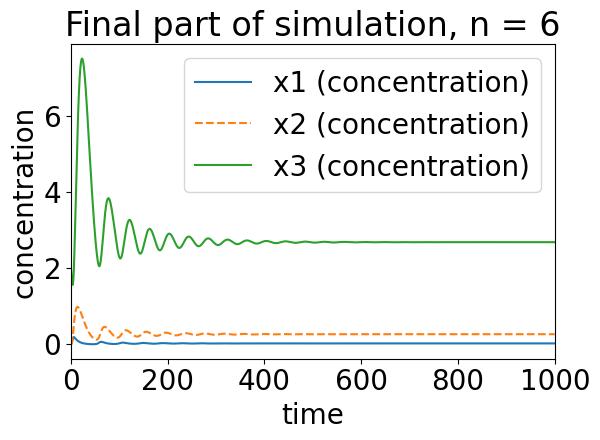

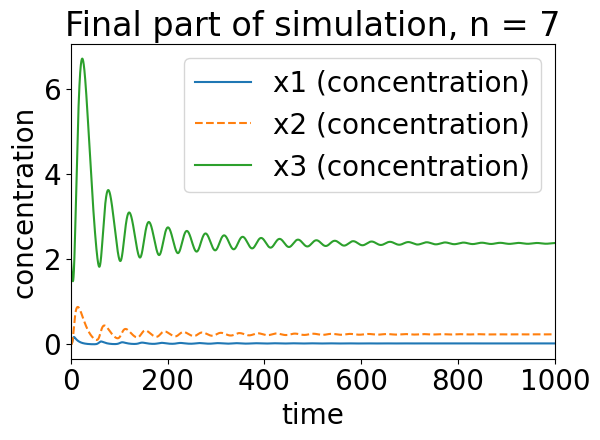

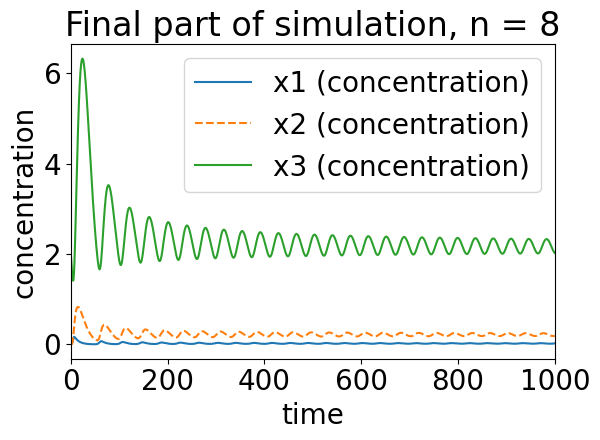

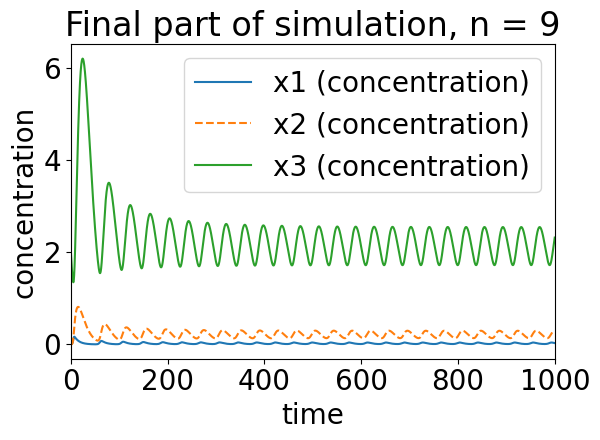

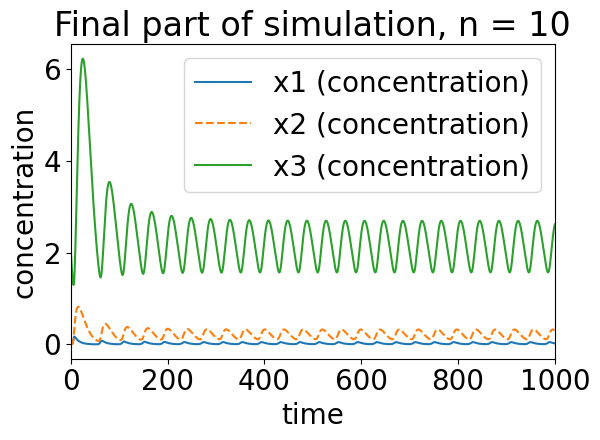

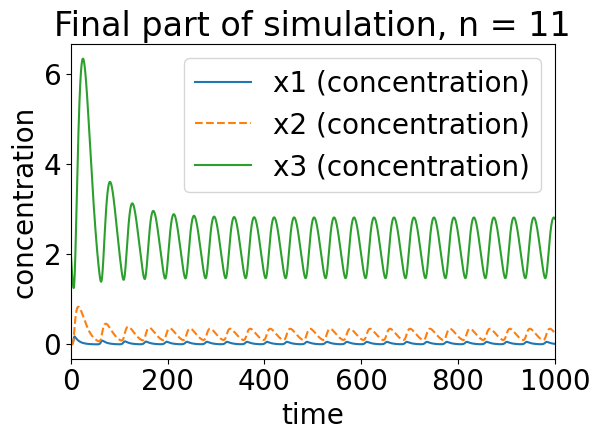

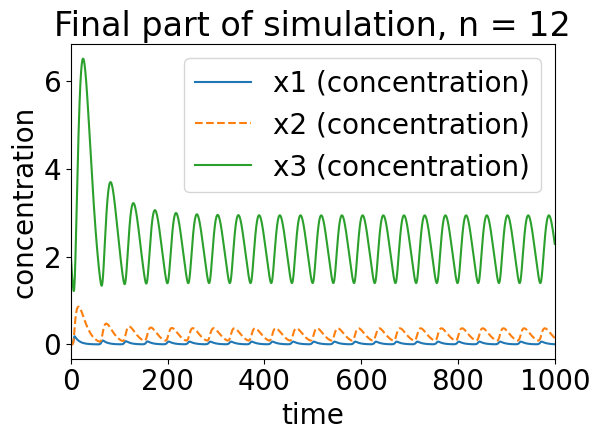

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def oscillation(vars, t, k1=0.1, k2=0.1, k3=0.1, n=2):
    x1, x2, x3 = vars

    dx1_dt = 1 / (1 + x3**n) - k1 * x1 
    dx2_dt = x1 - k2 * x2
    dx3_dt = x2 - k3 * x3  

    return [dx1_dt, dx2_dt, dx3_dt]

for n in range(1, 13):
    k1 = 0.1
    k2 = 0.1
    k3 = 0.1

    tvec = np.arange(0, 1000, 0.01)

    Ap_0 = [0, 0, 2] 

    y = odeint(oscillation, Ap_0, tvec, args=(k1, k2, k3, n))

    plt.plot(tvec, y[:, 0], label='x1 (concentration)')
    plt.plot(tvec, y[:, 1], label='x2 (concentration)', linestyle='--')
    plt.plot(tvec, y[:, 2], label='x3 (concentration)')
    plt.legend()
    plt.xlim(0,1000)
    plt.xlabel('time')
    plt.ylabel('concentration')
    plt.title(f"Final part of simulation, n = {n}")
    
    plt.tight_layout()
    plt.show()


---

As n increases, the system becomes more sensitive, so x1 reacts strongly to changes in x1, which makes the oscillations bigger at first. Eventually, the high sensitivity also helps the system settle faster, leading to a stable state. The first peak is quite strong because my initial concentration is far from my stable state so it creates a slingshot effect that results in a higher peak on the furst oscilation.

---

d) Add saturation to the degradation of $x_3$, with Michaelis constant K_d:

$$\frac{dx_3}{dt}=x_2-\frac{k_3\,x_3}{K_d+x_3}$$

Consider that $k_1=k_2=0.1$, $k_3=2$ and $K_d=0.01$. What do you observe now as $n$ increases? 



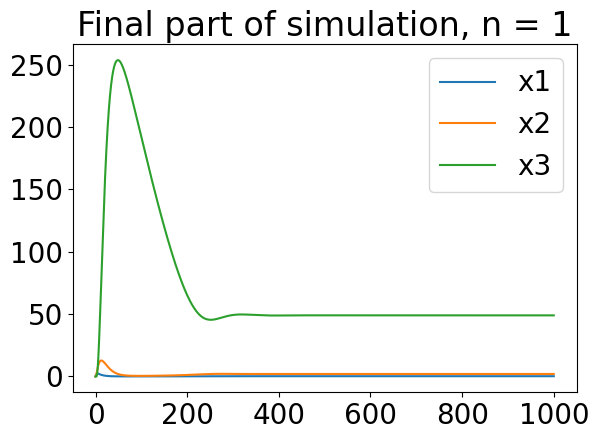

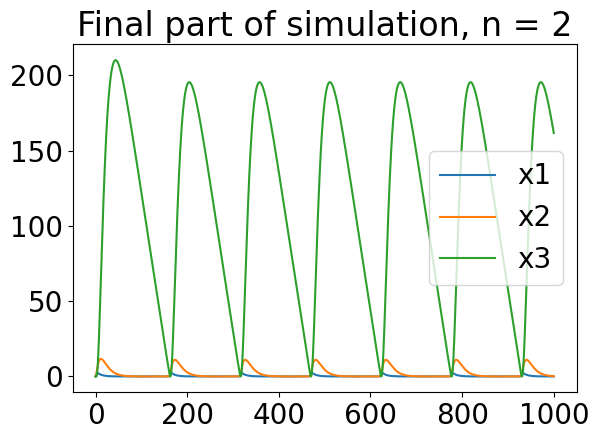

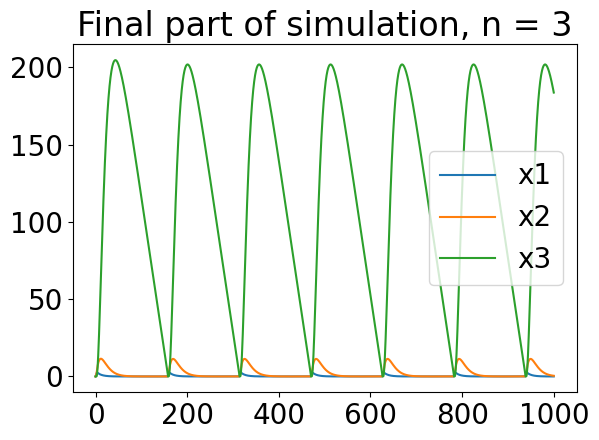

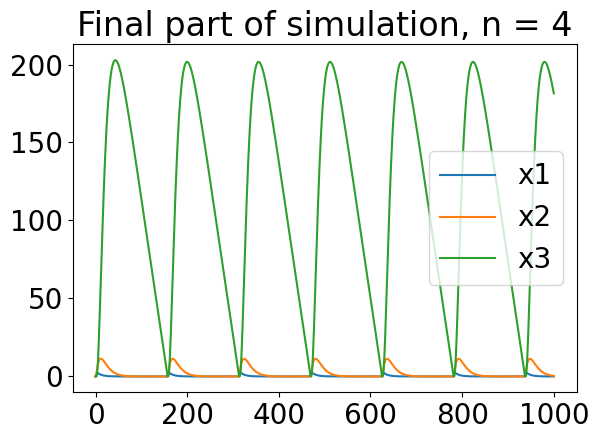

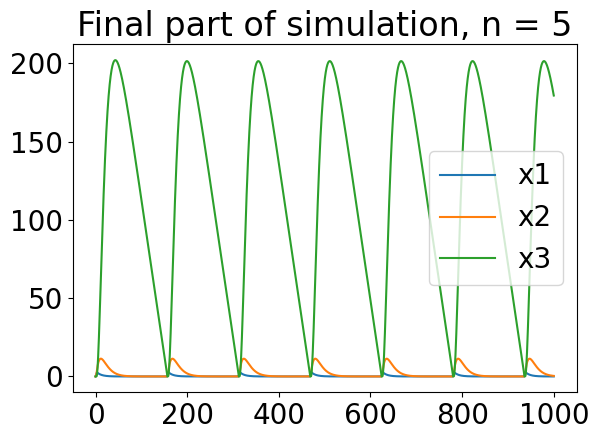

In [17]:
# Write your code here

k1=k2=0.1
k3= 2
K=0.01

def osc(x_list, t):
    x1=x_list[0]
    x2=x_list[1]
    x3= x_list[2]
    dx1_dt=1/(1+x3**n) - k1*x1
    dx2_dt=x1 - k2*x2
    dx3_dt= x2- ((k3*x3)/(K + x3))
    return [dx1_dt, dx2_dt, dx3_dt]

time=np.linspace(0, 1000, 10000)

#for loop for n
for n in range(1,6):
    x1_list=[]
    x2_list=[]
    x3_list =[]
    x0=[0, 0, 0]
    res=odeint(osc, x0, time)
    for v in res:
        x1_list.append(v[0])
        x2_list.append(v[1])
        x3_list.append(v[2])
    plt.title(f"Final part of simulation, n = {n}")
    plt.tight_layout()
    plt.plot(time, x1_list, label="x1")
    plt.plot(time, x2_list, label="x2")
    plt.plot(time, x3_list, label="x3")
    plt.legend()
    plt.show()

---

When n is set to 1, the system doesn’t oscillate and reaches a steady state after a brief spike. As n increases to 2 and 3, oscillations appear in both x2 and x3, with a more regular cycle forming at n = 3. Further increases in n don’t significantly affect the oscillation pattern. Compared to the previous graph, the oscillations now have a larger amplitude, likely due to x3's degradation, which introduces a delay. This delay amplifies the oscillations, indicating a system with strong feedback and stability.

---

B. **Oscillations from a single intermediate**

A negative feedback system can oscillate even with only one intermediate, if there are enough nonlinearities in the system. To see this, consider again the initial 2D system, but assume that there is an additional pathway of $x_2$ degradation that can saturate and whose activity is inhibited by high $x_2$ values. $x_2$ dynamics is now described by the following ODE:

 $\displaystyle{\frac{dx_2}{dt}}=x_1-k_2\,x_2-\displaystyle{\frac{k_3\,x_2}{K_m+x_2+x_2^2}}$

a) Plot the time evolution of the system for $k_1=k_2=0.1$, $k_3=5$, $n=2$, $K_m=0.1$.

b) Increase $K_m$ up to 10. What happens?

c) Plot the nullclines of the system and superimpose the corresponding trajectories. What do you observe?

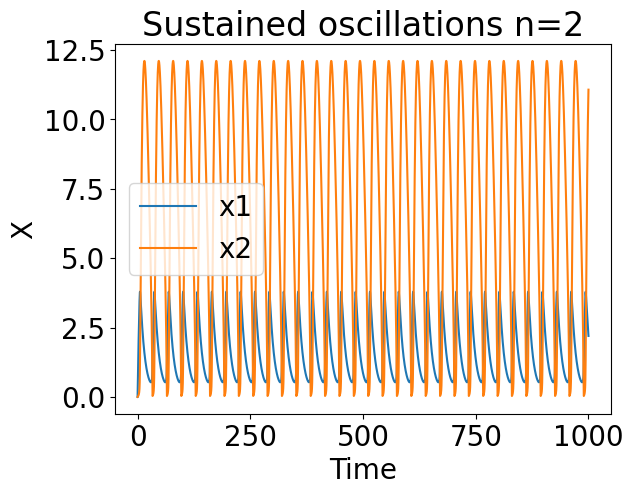

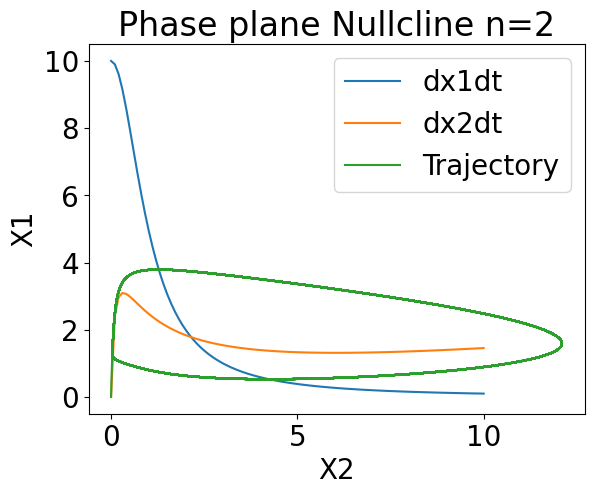

In [18]:
#A)
k1=0.1
k2=0.1
k3=5
K=0.1


def Xosc(x_list, t):
    x1=x_list[0]
    x2=x_list[1]
    dx1_dt=1/(1+x2**n) - k1*x1
    dx2_dt=x1 - (k2*x2) - ((k3*x2)/(K+x2+x2**2))

    return [dx1_dt, dx2_dt]

def Dosc(n, x2_listD):
    # Nullcline x1
    x1_nullC1 = 1 / (1 + x2_listD**n) / k1 

    # Nullcline x2
    x1_nullC2 = k2 * x2_listD + (k3 * x2_listD) / (K + x2_listD + x2_listD**2) 
    
    return x2_listD, x1_nullC1, x1_nullC2



time=np.linspace(0, 1000, 10000)

n=2

x1_list=[]
x2_list=[]
x0=[0, 0]
res=odeint(Xosc, x0, time)
for v in res:
    x1_list.append(v[0])
    x2_list.append(v[1])

x2_listD=np.linspace(0, 10, 100)
x2_listD, x1_nullC1, x1_nullC2=Dosc(n, x2_listD)

plt.plot(time, x1_list, label="x1")
plt.plot(time, x2_list, label="x2")
plt.title(f"Sustained oscillations n={n}")
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.show()

#Plot Nullclines
plt.plot(x2_listD, x1_nullC1, label="dx1dt")
plt.plot(x2_listD, x1_nullC2, label="dx2dt") 
plt.plot(x2_list, x1_list, label="Trajectory")
plt.title(f"Phase plane Nullcline n={n}")
plt.xlabel("X2")
plt.ylabel("X1")
plt.legend()
plt.show()

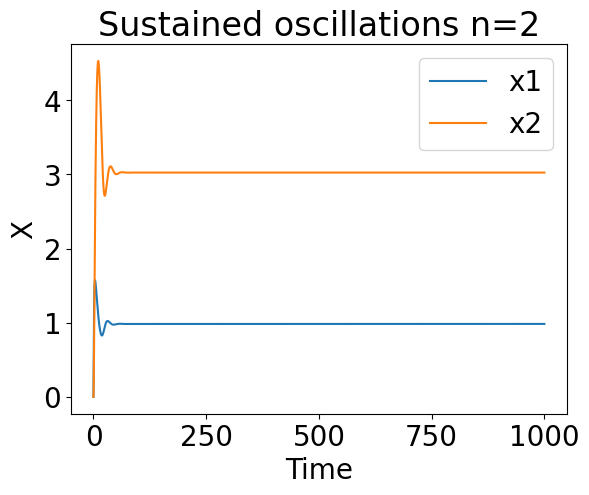

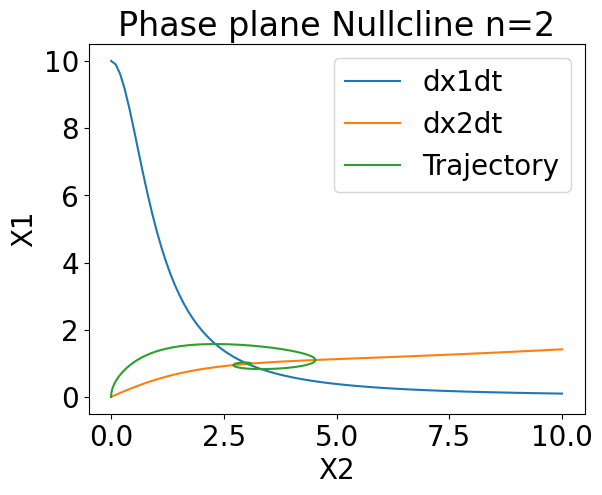

In [19]:
#B)

K = 10

n=2

x1_list=[]
x2_list=[]
x0=[0, 0]
res=odeint(Xosc, x0, time)
for v in res:
    x1_list.append(v[0])
    x2_list.append(v[1])

x2_listD=np.linspace(0, 10, 100)
x2_listD, x1_nullC1, x1_nullC2=Dosc(n, x2_listD)

plt.plot(time, x1_list, label="x1")
plt.plot(time, x2_list, label="x2")
plt.title(f"Sustained oscillations n={n}")
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.show()

#Plot Nullclines
plt.plot(x2_listD, x1_nullC1, label="dx1dt")
plt.plot(x2_listD, x1_nullC2, label="dx2dt") 
plt.plot(x2_list, x1_list, label="Trajectory")
plt.title(f"Phase plane Nullcline n={n}")
plt.xlabel("X2")
plt.ylabel("X1")
plt.legend()
plt.show()

---
When Km is 0.1, the degradation term changes quickly with changes in x2. This quick response creates strong feedback, causing x2 to repeatedly overshoot and undershoot its target, which leads to oscillations.
When Km is 10, the degradation term changes more slowly with x2, creating a smoother feedback response. This smoothness keeps the system stable, so it doesn’t oscillate and instead settles at a steady level.
---